In [33]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.utils import np_utils
import numpy as np
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
#Theano backend
from numpy import argmax


In [34]:
#load in the data set: 
jazz = pd.read_csv("data/jazz_csv.csv")
classical = pd.read_csv("data/classical_csv.csv")
country = pd.read_csv("data/country_csv.csv")
edm = pd.read_csv("data/edm_csv.csv")
rap = pd.read_csv("data/rap_csv.csv")
rock = pd.read_csv("data/rock_csv.csv")

In [35]:
count = 0
features = []
genres = []
dataframes = {1:jazz, 2: classical, 3:country, 4:edm, 5: rap, 6: rock} #map genre dfs to index
#dataframes = {1:jazz, 2: classical, 3:rock, 4:edm, 5: rap } #map genre dfs to index

for genre, dataframe in dataframes.items():
    count = 0
    for ind, row in dataframe.iterrows():
        count+=1
        #features.append([row["acousticness"], row["danceability"], row["energy"],row["loudness"], row["tempo"], row["valence"]])

        features.append([row["acousticness"],row["instrumentalness"], row["key"], row["danceability"], row["energy"],row["loudness"],row["speechiness"], row["tempo"], row["valence"]])
        genres.append(genre)

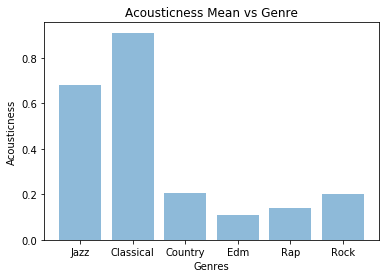

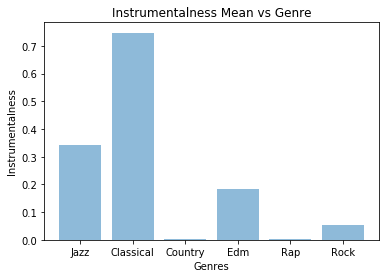

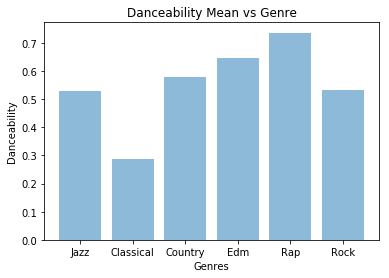

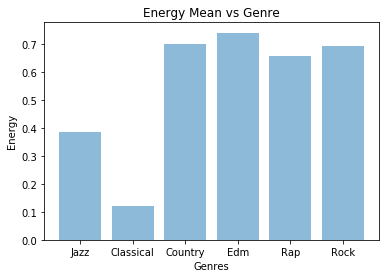

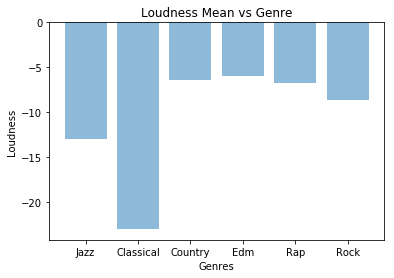

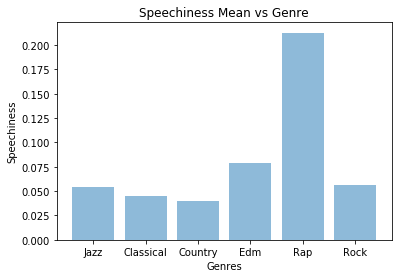

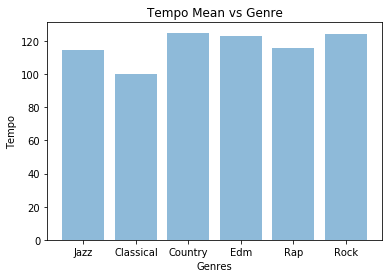

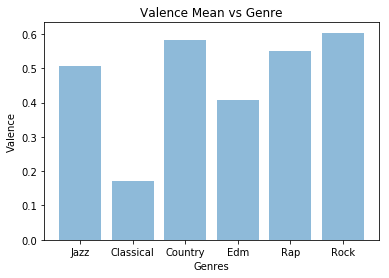

In [36]:
# Sumamry of the features we are using from Spotify's API

def visualizeMeans(dataframe):
    #print(dataframe["acousticness"])
    listOfMeans = []
    
    acousticnessM = np.mean(dataframe["acousticness"])
    instrumentalnessM = np.mean(dataframe["instrumentalness"])
    keyM = np.mean(dataframe["key"])
    danceabilityM = np.mean(dataframe["danceability"])
    energyM = np.mean(dataframe["energy"])
    loudnessM = np.mean(dataframe["loudness"])
    speechinessM = np.mean(dataframe["speechiness"])
    tempoM = np.mean(dataframe["tempo"])
    valenceM = np.mean(dataframe["valence"])
    
    listOfMeans.append(acousticnessM)
    listOfMeans.append(instrumentalnessM)
    listOfMeans.append(keyM)
    listOfMeans.append(danceabilityM)
    listOfMeans.append(energyM)
    listOfMeans.append(loudnessM)
    listOfMeans.append(speechinessM)
    listOfMeans.append(tempoM)
    listOfMeans.append(valenceM)
    
    return listOfMeans

jazzMeans = visualizeMeans(dataframes[1])
classicalMeans = visualizeMeans(dataframes[2])
countryMeans = visualizeMeans(dataframes[3])
edmMeans = visualizeMeans(dataframes[4])
rapMeans = visualizeMeans(dataframes[5])
rockMeans = visualizeMeans(dataframes[6])

def plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, feature, title, index):
    
    objects = ("Jazz", "Classical", "Country", "Edm", "Rap", "Rock")
    y_pos = np.arange(len(objects))
    performance = (jazzMeans[index], classicalMeans[index], countryMeans[index], edmMeans[index], rapMeans[index], rockMeans[index])
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Genres')
    plt.ylabel(feature)
    plt.title(title)
    
    plt.show()
    

plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Acousticness", "Acousticness Mean vs Genre", 0)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Instrumentalness", "Instrumentalness Mean vs Genre", 1)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Danceability", "Danceability Mean vs Genre", 3)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Energy", "Energy Mean vs Genre", 4)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Loudness", "Loudness Mean vs Genre", 5)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Speechiness", "Speechiness Mean vs Genre", 6)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Tempo", "Tempo Mean vs Genre", 7)
plotMeans(jazzMeans, classicalMeans, countryMeans, edmMeans, rapMeans, rockMeans, "Valence", "Valence Mean vs Genre", 8)


In [38]:
#Overall accuracy summary of our classificaiton methods

#Neural Network Stats
jazzAccNN =  0.7260869565217392
countryAccNN = 0.6025316455696202
rockAccNN = 0.6185819070904646
rapAccNN = 0.8507462686567164
classicalAccNN = 0.9103448275862069
edmAccNN = 0.7555012224938875
overallAccNN = 0.7458167330677291

overallAccNNList = [jazzAccNN,countryAccNN, rockAccNN, rapAccNN, classicalAccNN, edmAccNN, overallAccNN]

#Tree Classifier Stats
jazzAccT =  0.7504273504273504
countryAccT = 0.7383367139959433
rockAccT = 0.6182902584493042
rapAccT = 0.818
classicalAccT = 0.8845437616387337
edmAccT = 0.7148362235067437
overallAccT = 0.7551801083838062

overallAccTList = [jazzAccT,countryAccT, rockAccT, rapAccT, classicalAccT, edmAccT, overallAccT]

#Naive Bayes Stats
jazzAccNB =  0.636697247706422
countryAccT = 0
rockAccNB = 0.6286836935166994
rapAccNB = 0.944547134935305
classicalAccNB =0.8886792452830189
edmAccNB = 0.5831702544031311
overallAccNB = 0.738619119878604

overallAccNBList = [jazzAccNB,countryAccT, rockAccNB, rapAccNB, classicalAccNB, edmAccNB, overallAccNB]

#KNN k = 10 Baes Stats
jazzAccKNN10 = 0.4972477
countryAccKNN10 = 0.402578
rockAccKNN10 = 0.2082514
rapAccKNN10 = 0.4972273
classicalAccKNN10 = 0.822641509
edmAccKNN10 = 0.536203522
overallAccKNN10 = 0.4966549

overallAccKNN10List = [jazzAccKNN10,countryAccKNN10, rockAccKNN10, rapAccKNN10, classicalAccKNN10, edmAccKNN10, overallAccKNN10]

#KNN k = 15 Baes Stats
jazzAccKNN15 = 0.5394495
countryAccKNN15 = 0.38568
rockAccKNN15 = 0.19449901
rapAccKNN15 = 0.48059149
classicalAccKNN15 = 0.80566037
edmAccKNN15 = 0.5616438
overallAccKNN15 = 0.4972921

overallAccKNN15List = [jazzAccKNN15,countryAccKNN15, rockAccKNN15, rapAccKNN15, classicalAccKNN15, edmAccKNN15, overallAccKNN15]

#KNN k = 25 Baes Stats
jazzAccKNN25 = 0.53228962
countryAccKNN25 = 0.373757455
rockAccKNN25 = 0.19843829
rapAccKNN25 = 0.50646950
classicalAccKNN25 = 0.7924528301
edmAccKNN25 = 0.53228962
overallAccKNN25 = 0.4966549

overallAccKNN25List = [jazzAccKNN25,countryAccKNN25, rockAccKNN25, rapAccKNN25, classicalAccKNN25, edmAccKNN25, overallAccKNN25]

jazzKNN = [jazzAccKNN10,jazzAccKNN15,jazzAccKNN25]
countryKNN = [countryAccKNN10,countryAccKNN15,countryAccKNN25]
rockKNN = [rockAccKNN10,rockAccKNN15,rockAccKNN25]
rapKNN = [rapAccKNN10,rapAccKNN15,rapAccKNN25]
classicalKNN = [classicalAccKNN10,classicalAccKNN15,classicalAccKNN25]
edmKNN = [edmAccKNN10,edmAccKNN15,edmAccKNN25]
overallKNN = [overallAccKNN10,overallAccKNN15,overallAccKNN25]

In [39]:
def graphAcc(overallAccNNList, overallAccTList, overallAccNBList, overallAccKNN25List):
    

    # create plot
    n_groups = 7
    index = np.arange(n_groups)
    fig, ax = plt.subplots(figsize=(8, 6))
    objects = ("Jazz", "Country", "Rock", "Rap", "Classical", "EDM", "Overall")
    
    bar_width = 0.20
    opacity = 0.8

    rects1 = plt.bar(objects, overallAccNNList, bar_width,
    alpha=opacity,
    color=(0.3,0.9,0.4,0.6),
    label='Neural Network')

    rects2 = plt.bar(index + bar_width, overallAccTList, bar_width,
    alpha=opacity,
    color=(0.3,0.1,0.4,0.6),
    label='Random Forest')
    
    rects3 = plt.bar(index+ bar_width + bar_width, overallAccNBList, bar_width,
    alpha=opacity,
    color=(0.3,0.5,0.4,0.6),
    label='Naive Bayes')
    
    rects4 = plt.bar(index+ bar_width + bar_width + bar_width, overallAccKNN25List, bar_width,
    alpha=opacity,
    color=(0.0,0.2,0.4,0.1),
    label='KNN k=25')
    
    plt.xlabel('Genre')
    plt.ylabel('Accuracy')
    plt.title('Classification Accuracy')
    plt.xticks(index + bar_width, objects)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    

    
    

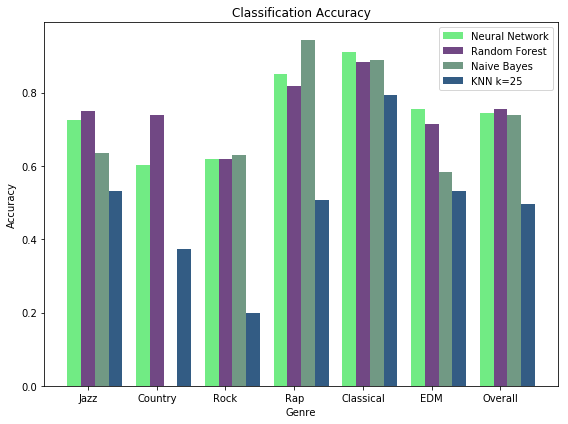

In [40]:
graphAcc(overallAccNNList, overallAccTList, overallAccNBList, overallAccKNN25List)

In [69]:

def graphAccKNN(jazzKNN, countryKNN, rockKNN, rapKNN, classicalKNN, edmKNN, overallKNN):
    
     # create plot
        
        
    n_groups = 7
    index = np.arange(n_groups)
    fig, ax = plt.subplots(figsize=(8, 6))
    objects = ("Jazz", "Country", "Rock", "Rap", "Classical", "EDM", "Overall")
    ks = [10, 15, 25]
    plt.plot(ks,jazzKNN,label="Jazz", marker='o', alpha=0.7)
    plt.plot(ks,countryKNN,label="Country", marker='o',  alpha=0.7)
    plt.plot(ks,rockKNN, label="Rock", marker='o',  alpha=0.7)
    plt.plot(ks,rapKNN, label="Rap", marker='o',  alpha=0.7)
    plt.plot(ks,classicalKNN, label="Classical", marker='o', alpha=0.7)
    plt.plot(ks,edmKNN,  label="EDM", marker='o', alpha=0.7)
    plt.plot(ks,overallKNN, label="Overall",marker='*', alpha=0.7)
    
    
   
    
    plt.xlabel('K Iterations')
    plt.ylabel('Accuracy')
    plt.title('KNN Classification Accuracy')
    plt.legend(loc  = 'upper right')
    plt.xticks(ks) 
    
    plt.show()
    

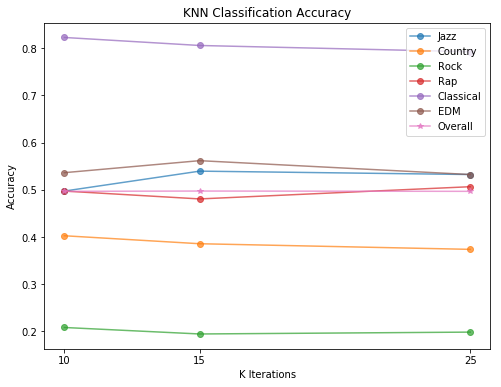

In [70]:
graphAccKNN(jazzKNN, countryKNN, rockKNN, rapKNN, classicalKNN, edmKNN, overallKNN)